# GROUP PROJECT 1 - R

***
## FWL Theorem proof

The FWL Theorem demostrates one property of the OLS regression method.
Suppose that for a given $Y$ dependent variable we have an explanatory variable $D$
and another subset of $k$ explanatory variables grouped in $X$. 
We will focus just in the  first subset of explanatory variables and we'll take the second subset as 
auxiliary variables. 

$$
\begin{align}
\ Y &= D \beta_{D}    + X  \beta_{X}  + \epsilon \\
\end{align}
$$

If we then regress  (1) via OLS we would obtain 

$$
\begin{align}
\ \hat{Y} &= D \hat{\beta_{D}}    + X  \hat{\beta_{X}}  + \hat{\epsilon}
\end{align}
$$

Then consider the following regression equations and the corresponding regression  estimates.

$$
\begin{align}
\ Y &= X \beta_{xy}   + \epsilon_{xy} \\
\ \tilde{Y} &=  X \hat{\beta_{xy}}   + \hat{\epsilon_{xy}} \\
\ D &= X \beta_{xd}   + \epsilon_{xd} \\
\ \tilde{D} &= X \hat{\beta_{xd}}   + \hat{\epsilon_{xd}} \\
\ \epsilon_{xy} =  \epsilon_{xd} \delta + u_i \\
\ \hat{\epsilon_{xy}} = \hat{\epsilon_{xd}} \hat{\delta} + \hat{u_i} \\
\end{align}
$$


The FWL Theorem states that for a given population, the parameter $\beta_1$ obtained in (1) is the same parameter as the $\delta$ in (7).
 Consequently,
the estimators $\hat{\beta_{1}}$ and $\hat{\delta}$ will converge to the same value.


We can proof this by the following steps. 
***
#### Proof


Replacing regressions (3) and (5) on (1) we obtain

$$
\begin{align}
\ \epsilon_{xy} = (X \beta_{xd}   + \epsilon_{xd}) \beta_{D}    + X  (\beta_{X} - \beta_{xy})  + \epsilon  
\end{align}
$$

Where the property of the OLS method states that $error$ isn't correlated with the explanatory variables 


$$
\begin{align}
\  corr(\epsilon_{xy}, X) = 0  {\space} ; corr(\epsilon , X) = 0  
\end{align}
 $$

Consequently, there's a second property that arises
. This property stands that if some explanatory variable is not correlated with the dependent variable the coefficient of the explanatory variable will be 0. 


Then (9) can be expressed as.

$$
\begin{align}
\ \epsilon_{xy} = \epsilon_{xd} \beta_{D}    + \epsilon  
\end{align}
$$

We note that the expression (10) is the same as (7). Therefore  $\beta_{D}$ = $\delta$ and $ \epsilon $ = $u_i$.

***

#### References
<a id="1">[1]</a> 
Lovell, M. (2007). 
A Simple Proof of the FWL (Frisch-Waugh-Lovell) Theorem 
Wesleyan University





## Import data

In [14]:
load("C:/Users/usuario/Documents/GitHub/Grupo-7---Estadistica-Aplicada/data/wage2015_subsample_inference.Rdata")
attach(data)

dim(data)

[1] 5150   20

## Data analysis

For this project, we select the cases of the subset of college-educated workers, including those who have some college education or are college graduates (scl, clg variables respectively).

In [15]:
library(xtable)
library(dplyr)
install.packages("ggplot2")
#Filter samples

data_z<-filter(data,scl==1 | clg==1)

z<- data[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]

# Comparing the sample means

data_scl <- data[data$scl==1,]
z_college <- data_scl[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]

data_clg <- data[data$clg==1,]
z_graduate <- data_clg[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]   

table <- matrix(0, 12, 3)
table[1:12,1]   <- as.numeric(lapply(z,mean))
table[1:12,2]   <- as.numeric(lapply(z_college,mean))
table[1:12,3]   <- as.numeric(lapply(z_graduate,mean))
rownames(table) <- c("Log Wage","Sex","Less then High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience")
colnames(table) <- c("All","SomeCollege","Graduate")
tab<- xtable(table, digits = 4)
tab
                          


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



,All,SomeCollege,Graduate
Log Wage,2.97078670,2.8473351,3.1336703
Sex,0.44446602,0.4539106,0.4859413
Less then High School,0.02330097,0.0000000,0.0000000
High School Graduate,0.24388350,0.0000000,0.0000000
Some College,0.27805825,1.0000000,0.0000000
Gollage Graduate,0.31766990,0.0000000,1.0000000
Advanced Degree,0.13708738,0.0000000,0.0000000
Northeast,0.25961165,0.3058659,0.2310513
Midwest,0.29650485,0.2821229,0.2891198
South,0.21611650,0.2255587,0.2182152


In [16]:

print(tab,type="html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Sep 10 16:30:04 2021 -->
<table border=1>
<tr> <th>  </th> <th> All </th> <th> SomeCollege </th> <th> Graduate </th>  </tr>
  <tr> <td align="right"> Log Wage </td> <td align="right"> 2.9708 </td> <td align="right"> 2.8473 </td> <td align="right"> 3.1337 </td> </tr>
  <tr> <td align="right"> Sex </td> <td align="right"> 0.4445 </td> <td align="right"> 0.4539 </td> <td align="right"> 0.4859 </td> </tr>
  <tr> <td align="right"> Less then High School </td> <td align="right"> 0.0233 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> High School Graduate </td> <td align="right"> 0.2439 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Some College </td> <td align="right"> 0.2781 </td> <td align="right"> 1.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Gollage Graduate </td> <td align="rig

In [17]:
mean(data_scl$lwage)-mean(data_clg$lwage)

[1] -0.2863352

## OLS unconditional model

We regress $Y$ on ($X_{clg}$) respecitvely and then we obtain the. estimated $\beta_{clg}$ which could be interpreted as the wage gap between both college groups. Remember that we are working only with the subset of college-educated workers.

In [18]:
install.packages('sandwich')
library(sandwich)
nocontrol.fit <- lm(lwage ~ scl, data=data_z)
nocontrol.est <- summary(nocontrol.fit)$coef["scl",1]
HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se)



  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



The estimated gender coefficient is -0.2863352  and the corresponding robust standard error is 0.01901812

# OLS regression with control variables

We run an OLS regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

$$\begin{align}
\log(Y) =\beta_1 D  + \beta_2' W + \epsilon.
\end{align}$$
Where $W$ controls for experience, gender, region, and occupation and industry indicators plus transformations and two-way interactions.

In [19]:
# Ols regression with controls

flex <- lwage ~ scl + (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we)

control.fit <- lm(flex, data=data_z)
control.est <- summary(control.fit)$coef[2,1]

summary(control.fit)

cat("Coefficient for OLS with controls", control.est)

HCV.coefs <- vcovHC(control.fit, type = 'HC');
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors


Call:
lm(formula = flex, data = data_z)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8762 -0.2769 -0.0071  0.2555  2.8838 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.6790742  0.5067140   7.261 4.95e-13 ***
scl         -0.2366632  0.0200261 -11.818  < 2e-16 ***
exp1        -0.1738842  0.1964717  -0.885 0.376213    
exp2         3.9281196  2.3523655   1.670 0.095057 .  
exp3        -2.1345919  1.0078071  -2.118 0.034257 *  
exp4         0.3282663  0.1371077   2.394 0.016720 *  
sex         -0.0313878  0.0812314  -0.386 0.699230    
occ22        0.2114485  0.1581209   1.337 0.181245    
occ23        0.0518320  0.2111338   0.245 0.806092    
occ24        0.0372946  0.2311123   0.161 0.871814    
occ25       -0.2803966  0.3954481  -0.709 0.478345    
occ26       -0.2087045  0.2703103  -0.772 0.440124    
occ27       -0.1273546  0.4192056  -0.304 0.761303    
occ28       -0.1902268  0.2716609  -0.7

Coefficient for OLS with controls -0.2366632

The estimated regression coefficient $\beta_1\approx-0.2366$ measures how our linear prediction of wage changes if we set the college education variable $D$ from 0 (the worker is a college graduate) to 1 (the worker has completed some college education, but is not a college graduate), holding the control variables in $W$ fixed. We see that the unconditional wage gap of $28.63$% for education decresases to $23.67$% after controlling for worker characteristics.

# Partialling-Out using OLS




Using the partialling-out method we expect to obtain the same estimator $\beta_1$ that we got in the OLS regression with control variables.

In [20]:
# Partialling-Out using ols

# model for y
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we) 
# model for d
flex.d <- scl ~ (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we) 

# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=data_z)$res
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=data_z)$res

# regression of Y on D after partialling-out the effect of W
partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1]

cat("Coefficient for D via partialling-out", partial.est)

# standard error
HCV.coefs <- vcovHC(partial.fit, type = 'HC')
partial.se <- sqrt(diag(HCV.coefs))[2]

# confidence interval
confint(partial.fit)[2,]

Coefficient for D via partialling-out -0.2366632

2.5 %     97.5 % 
-0.2744410 -0.1988853

The estimated coeficient for $D$ via partialling-out is equal to the coefficient $\beta_1$ estimated with the OLS regression, after controlling for the effects of the variables contained in $W$.

## GRAPHS

We are going to group individuals by its experience years and then we are going to calculate the mean of each group of experience. The objective of this is to smooth the data.

In [50]:
#install.packages("ggplot2")
#library(ggplot2)

data_graph_scl <- data_scl %>%
    group_by(exp1) %>%
    summarize(mean_exp_scl = mean(lwage))

data_graph_clg <- data_clg %>%
    group_by(exp1) %>%
    summarize(mean_exp_clg = mean(lwage))


data_graph = merge(data_graph_clg, data_graph_scl, by = "exp1", all = TRUE)

dim(data_graph)




[1] 82  3

Now we are going to plot the experience means and the respective fitting function.

Warning message:
"Removed 42 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 42 rows containing missing values (geom_point)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

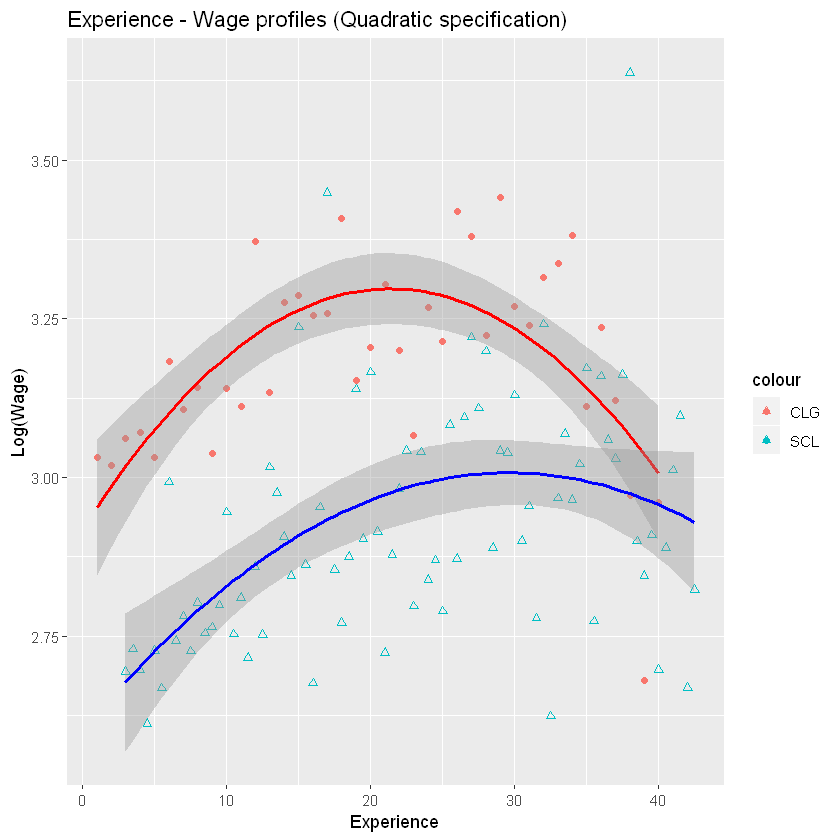

In [65]:
ggplot(data_graph, aes(x=exp1)) +  geom_point(aes(y = mean_exp_clg, color = "CLG"), shape = 16) +
      geom_point(aes(y = mean_exp_scl, color = "SCL"), shape = 2) + stat_smooth(aes(y = mean_exp_clg),method = "lm", formula = y ~ x + I(x^2), size = 1 , color = "red") +
      stat_smooth(aes(y = mean_exp_scl),method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue") +  labs(title = "Experience - Wage profiles (Quadratic specification)") +
         xlab('Experience') + ylab('Log(Wage)') 


Warning message:
"Removed 42 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 42 rows containing missing values (geom_point)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

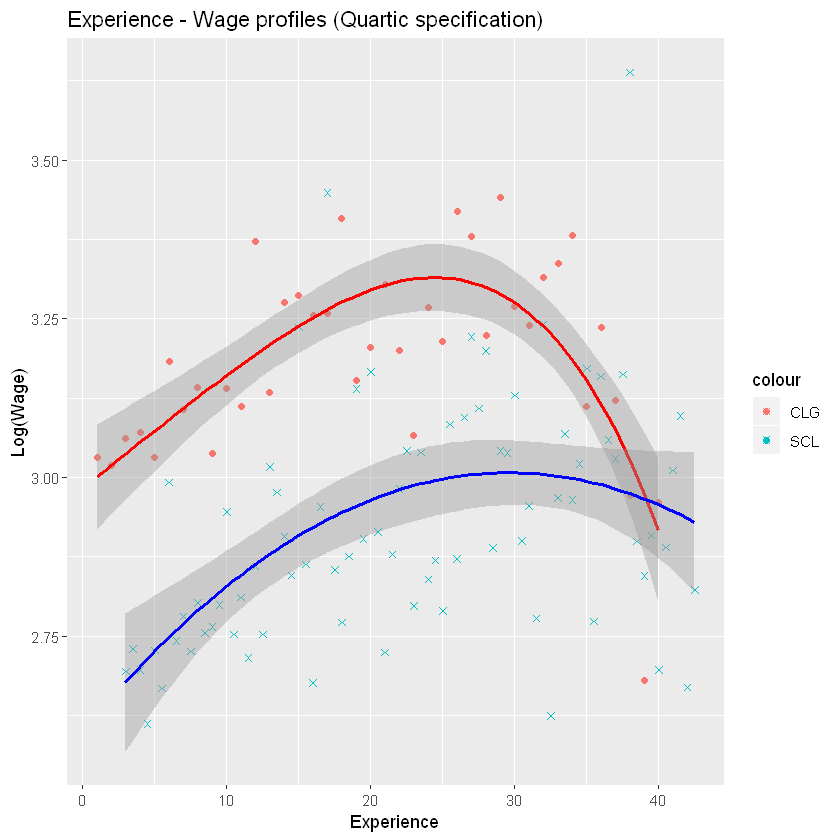

In [63]:
ggplot(data_graph, aes(x=exp1)) +  geom_point(aes(y = mean_exp_clg, color = "CLG"), shape = 16) +
      geom_point(aes(y = mean_exp_scl, color = "SCL"), shape = 4) + stat_smooth(aes(y = mean_exp_clg),method = "lm", formula = y ~ x + I(x^4), size = 1, color ="red") +
      stat_smooth(aes(y = mean_exp_scl),method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue") +  labs(title = "Experience - Wage profiles (Quartic specification)") +
         xlab('Experience') + ylab('Log(Wage)') 


As expected we found that the experience-wages profile has an inverted "U" shape.